# Reading Data from Text Files

In [2]:
import os
import numpy as np
from sklearn.decomposition import PCA

data_directory = "/home/hussein/PatternDatasets/Activities"
training_data_means = []
evaluation_data_means = []
flattened_training_data = []
flattened_evaluation_data = []
training_labels = []
evaluation_labels = []

# Step 1: Accessing the Data Directory
activities = os.listdir(data_directory)

# Step 2: Iterating Through Activity Folders
for activity in activities:
    activity_path = os.path.join(data_directory, activity)
    activity_number = int(activity.split("a")[1])
    
    print("Activity Number:", activity_number)
    print("Activity:", activity)
    training_labels.extend([activity_number] * 48)  # 48 segments for training
    evaluation_labels.extend([activity_number] * 12)  # 12 segments for evaluation
    
    
    # Step 3: Iterating Through Subject Folders
    subjects = os.listdir(activity_path)
    for subject in subjects:
        subject_path = os.path.join(activity_path, subject)
        
        # Step 4: Reading Text Files (Segments)
        segments = os.listdir(subject_path)
        training_segments = segments[:48]  # First 48 segments for training
        evaluation_segments = segments[48:]  # Rest for evaluation
        
        for segment_file in training_segments:
            segment_file_path = os.path.join(subject_path, segment_file)
            with open(segment_file_path, 'r') as file:
                segment_data = np.loadtxt(file, delimiter=',')
                mean_data = np.mean(segment_data, axis=0)  # Taking mean along columns
                training_data_means.append(mean_data)
                
                flattened_data = segment_data.flatten()  # Flattening the segment
                flattened_training_data.append(flattened_data)
        
        for segment_file in evaluation_segments:
            segment_file_path = os.path.join(subject_path, segment_file)
            with open(segment_file_path, 'r') as file:
                segment_data = np.loadtxt(file, delimiter=',')
                mean_data = np.mean(segment_data, axis=0)  # Taking mean along columns
                evaluation_data_means.append(mean_data)
                
                flattened_data = segment_data.flatten()  # Flattening the segment
                flattened_evaluation_data.append(flattened_data)

# Convert the data lists into numpy arrays
training_data_means = np.array(training_data_means)
evaluation_data_means = np.array(evaluation_data_means)
flattened_training_data = np.array(flattened_training_data)
flattened_evaluation_data = np.array(flattened_evaluation_data)
PCA_training_data = PCA(n_components=0.9).fit_transform(flattened_training_data)
PCA_evaluation_data = PCA(n_components=0.9).fit_transform(flattened_evaluation_data)


# Now, 'training_data_means' and 'evaluation_data_means' contain mean values of each column for each segment,
# and 'flattened_training_data' and 'flattened_evaluation_data' contain flattened data for each segment.
print("Shape of training data (means):", training_data_means.shape)
print("Shape of evaluation data (means):", evaluation_data_means.shape)
print("Shape of flattened training data:", flattened_training_data.shape)
print("Shape of flattened evaluation data:", flattened_evaluation_data.shape)
print("Shape of PCA training data:", PCA_training_data.shape)
print("Shape of PCA evaluation data:", PCA_evaluation_data.shape)


Activity Number: 11
Activity: a11
Activity Number: 13
Activity: a13
Activity Number: 18
Activity: a18
Activity Number: 3
Activity: a03
Activity Number: 5
Activity: a05
Activity Number: 4
Activity: a04
Activity Number: 19
Activity: a19
Activity Number: 6
Activity: a06
Activity Number: 7
Activity: a07
Activity Number: 8
Activity: a08
Activity Number: 2
Activity: a02
Activity Number: 1
Activity: a01
Activity Number: 12
Activity: a12
Activity Number: 15
Activity: a15
Activity Number: 17
Activity: a17
Activity Number: 14
Activity: a14
Activity Number: 16
Activity: a16
Activity Number: 10
Activity: a10
Activity Number: 9
Activity: a09
Shape of training data (means): (7296, 45)
Shape of evaluation data (means): (1824, 45)
Shape of flattened training data: (7296, 5625)
Shape of flattened evaluation data: (1824, 5625)
Shape of PCA training data: (7296, 346)
Shape of PCA evaluation data: (1824, 197)


# Kmeans Clustering implementation

In [3]:
class Kmeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.centroids = None
        self.cluster_centers_ = None
        self.labels_ = None
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.inertia_ = None
        np.random.seed(42)

    def fit(self, data):
        # Initialize centroids randomly
        labels= None
        centroids_idx = np.random.choice(data.shape[0], self.n_clusters, replace=False)
        self.centroids = data[centroids_idx]

        for _ in range(self.max_iter):
            # Assignment step
            distances = np.linalg.norm(data[:, None] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # Update step
            new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids

        self.labels_ = labels
        self.cluster_centers_ = self.centroids

        # Calculate inertia
        self.inertia_ = self._calculate_inertia(data)

    def _calculate_inertia(self, data):
        inertia = 0
        for i in range(self.n_clusters):
            cluster_points = data[self.labels_ == i]
            distances = np.linalg.norm(cluster_points - self.centroids[i], axis=1)
            inertia += np.sum(distances**2)
        return inertia

    def predict(self, data):
        distances = np.linalg.norm(data[:, None] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Applying Kmeans Clustering on the first approach

In [4]:
from sklearn import metrics
k=[8, 13, 19, 28, 38]
means_score = []
means_inertia = []
for i in k:
    kmeans = Kmeans(n_clusters=i)
    kmeans.fit(training_data_means)
    means_score.append(metrics.silhouette_score(training_data_means, kmeans.labels_, metric='euclidean'))
    means_inertia.append(kmeans.inertia_)
    print("Silhouette Score:", means_score[-1])
    print("Inertia:", kmeans.inertia_)


Silhouette Score: 0.20582421734077247
Inertia: 406192.0104156245
Silhouette Score: 0.18067801194879612
Inertia: 351771.9702320236
Silhouette Score: 0.2247389440945375
Inertia: 244950.2323166069
Silhouette Score: 0.2421022670539106
Inertia: 212385.666025683
Silhouette Score: 0.2594968500265767
Inertia: 167059.42971826


# Applying Kmeans Clustering on the second approach

In [5]:
reduce_score = []
reduce_inertia = []
for i in k:
    kmeans = Kmeans(n_clusters=i)
    kmeans.fit(PCA_training_data)
    reduce_score.append(metrics.silhouette_score(PCA_training_data, kmeans.labels_, metric='euclidean'))
    reduce_inertia.append(kmeans.inertia_)
    print("Silhouette Score:", reduce_score[-1])
    print("Inertia:", kmeans.inertia_)

Silhouette Score: 0.14723999657977765
Inertia: 185800661.96200022
Silhouette Score: 0.11088765376983699
Inertia: 171617136.6831025
Silhouette Score: 0.08864941242367827
Inertia: 156171003.20622104
Silhouette Score: 0.07207736818220811
Inertia: 148413133.60446167
Silhouette Score: 0.0816261061301823
Inertia: 138076591.48617598


# Plotting the results

## Silhouette Score vs Number of Clusters

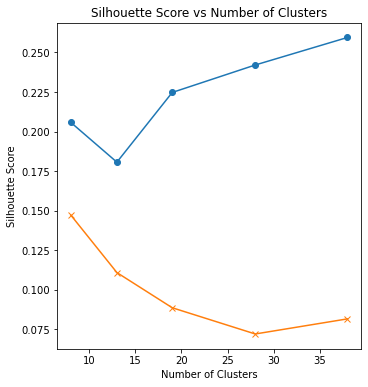

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k, means_score, marker='o', label='Mean Data')
plt.plot(k, reduce_score, marker='x', label='PCA Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

From the plot we see that the silhouette score is higher for the mean data compared to the PCA data. This indicates that the mean data is more suitable for clustering compared to the PCA data. The silhouette score is highest for 38 clusters in mean data case while the highest for 8 clusters in the PCA data case.

## Inertia vs Number of Clusters

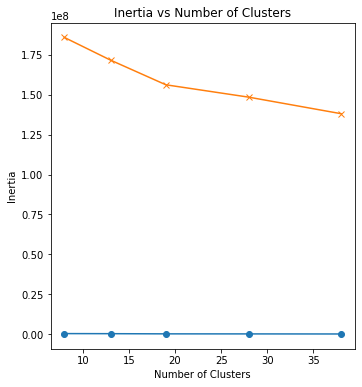

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(k, means_inertia, marker='o', label='Mean Data')
plt.plot(k, reduce_inertia, marker='x', label='PCA Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

From the plot we see that the inertia is higher for the PCA data compared to the mean data. This indicates that the mean data is more suitable for clustering compared to the PCA data. The inertia is highest for 8 clusters in both cases.

# Conclusion

We observed that the mean data is more suitable for clustering compared to the PCA data as the silhouette score is higher for the mean data compared to the PCA data and the inertia is lower for the mean data compared to the PCA data.